In [70]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

## Import Data

In [71]:
train_csv = pd.read_csv('./train.tsv',sep='\t', header=None)#header needed for access to data columns
test_csv = pd.read_csv('./test.tsv', sep='\t', header=None)

train_csv.head()
#test_csv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


## Shape of data

In [72]:
print(train_csv.shape)
print(test_csv.shape)

(10240, 14)
(1267, 14)


## Some Help Functions

In [73]:
def prepareScenario1(y_data):
    y_data_new = y_data.copy()
    y_data_new[y_data_new == 'half-true'] = 'false'
    y_data_new[y_data_new == 'mostly-true'] = 'false'
    y_data_new[y_data_new == 'pants-fire'] = 'false'
    y_data_new[y_data_new == 'barely-true'] = 'false'
    return y_data_new

def prepareScenario2(y_data):
    y_data_new = y_data.copy()
    y_data_new[y_data_new == 'half-true'] = 'true'
    y_data_new[y_data_new == 'mostly-true'] = 'true'
    y_data_new[y_data_new == 'pants-fire'] = 'false'
    y_data_new[y_data_new == 'barely-true'] = 'false'
    return y_data_new

def printLabelStatistic(y_data):
    label = y_data.unique()
    print(label)
    for l in label:
        print(l, len(y_data[y_data == l]))
    print()

## Preparing the data 

In [74]:
test_X = test_csv[2]
test_Y = test_csv[1]

train_X = train_csv[2]
train_Y = train_csv[1]

printLabelStatistic(test_Y)

test_1_Y = prepareScenario1(test_Y)
test_2_Y = prepareScenario2(test_Y)

printLabelStatistic(test_1_Y)
printLabelStatistic(test_2_Y)

printLabelStatistic(train_Y)

train_1_Y = prepareScenario1(train_Y)
train_2_Y = prepareScenario2(train_Y)

printLabelStatistic(train_1_Y)
printLabelStatistic(train_2_Y)

['true' 'false' 'half-true' 'pants-fire' 'barely-true' 'mostly-true']
true 208
false 249
half-true 265
pants-fire 92
barely-true 212
mostly-true 241

['true' 'false']
true 208
false 1059

['true' 'false']
true 714
false 553

['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']
false 1995
half-true 2114
mostly-true 1962
true 1676
barely-true 1654
pants-fire 839

['false' 'true']
false 8564
true 1676

['false' 'true']
false 4488
true 5752



## Calculate features and Representations for each element

In [75]:

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(train_X) #learn + get Result
count_test = count_vectorizer.transform(test_X)#is already learned ==> only get Results


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(train_X)
tfidf_test = tfidf_vectorizer.transform(test_X)

## Helf function for displaying results

In [76]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [80]:
#This is needed to see the images. Otherwise plots not visible
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\users\becker\appdata\local\programs\python\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Count Features + Scenario 1

accuracy:   0.836
Confusion matrix, without normalization


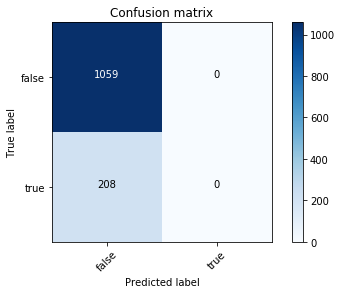

In [87]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(count_train, train_1_Y)
pred = clf.predict(count_test)
score = metrics.accuracy_score(test_1_Y, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(test_1_Y, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['false', 'true'])

## Count Features + Scenario 2

accuracy:   0.564
Confusion matrix, without normalization


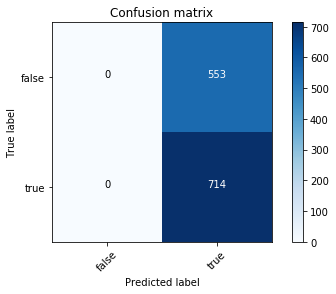

In [88]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(count_train, train_2_Y)
pred = clf.predict(count_test)
score = metrics.accuracy_score(test_2_Y, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(test_2_Y, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['false', 'true'])

## TF-IDF Features + Scenario 1

accuracy:   0.836
Confusion matrix, without normalization


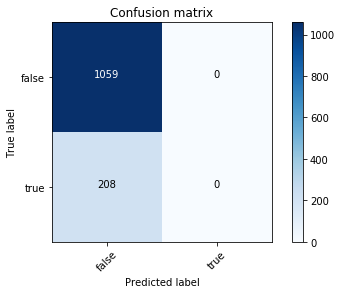

In [89]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(tfidf_train, train_1_Y)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(test_1_Y, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(test_1_Y, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['false', 'true'])

## TF-IDF Features + Scenario 2

accuracy:   0.564
Confusion matrix, without normalization


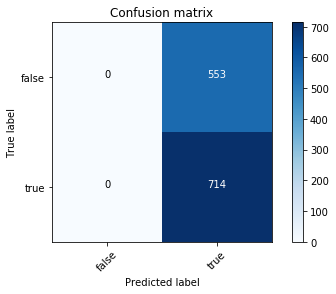

In [90]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(tfidf_train, train_2_Y)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(test_2_Y, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(test_2_Y, pred, labels=['false', 'true'])
plot_confusion_matrix(cm, classes=['false', 'true'])